In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [31]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,513769,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,456516,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,416804,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,434216,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,487753,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [32]:
data=df
data["No_of_hotel_booked"] = data["No_of_hotel_booked"]*4
data['Tourists']=data['No_of_hotel_booked']

In [33]:
# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
train_data = data['2010-01-01':'2022-12-01']
test_data = data['2010-01-01':'2022-12-01']

In [34]:
# data.info()

In [35]:
data.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,2055076,2010,1,2991,2055076,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,1826064,2010,2,2812,1826064,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,1667216,2010,3,3136,1667216,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,1736864,2010,4,2668,1736864,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,1951012,2010,5,2518,1951012,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [1]:
# Load the dataset
# data = pd.read_csv("your_data.csv")

# Select the relevant columns
data1 = data[['Year', 'Month', 'No_of_flight_bookings', 'No_of_hotel_booked', 'Tourism', 'Tourism_Packages', 'Tourist_Places', 'Travel', 'Food_Drink', 'Flights_Kerala', 'Trains_Kerala', 'Rain', 'T_Max', 'T_Min']]

data2=data[['Tourists']]

# Normalize the data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data1)
# Define the sequence length and split the data into input sequences and target values
sequence_length = 12  # You can adjust this value

X, y = [], []


for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, 1:])  # Use iloc to select features from the second column onwards
    y.append(data2.iloc[i + sequence_length, 0])  # Select the "Total Tourists" column as the target

X = np.array(X)
y = np.array(y)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X[:108]
y_train=y[:108]
X_test=X[:108]
y_test=y[:108]

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])))  # Adjust the input shape based on the number of input features
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output size is 1 for the "Total Tourists" prediction

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can choose a different loss function if needed

model.fit(X_train, y_train, epochs=500, batch_size=32)  # You can adjust the number of epochs and batch size

NameError: name 'data' is not defined

In [38]:
  # Use the last data points from the test set as input    
predictions = model.predict(X[:108])  # Predict the "Total Tourists" for the next time step

4/4 [==============================] - 1s 11ms/step


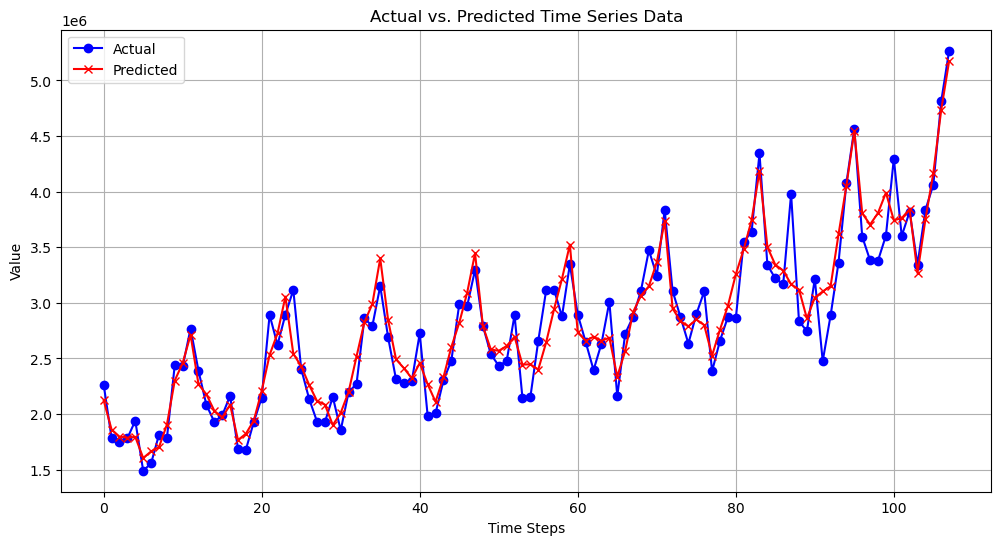

In [39]:
import matplotlib.pyplot as plt

# Inverse transform the actual test data to get it in the original scale

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y[0:108], label='Actual', color='blue', marker='o')
plt.plot(predictions, label='Predicted', color='red', marker='x')
plt.title('Actual vs. Predicted Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
data.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,2123306.250,2010,1,2991,2055076,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,1861236.000,2010,2,2812,1826064,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,1797776.875,2010,3,3136,1667216,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,1787449.625,2010,4,2668,1736864,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,1795854.375,2010,5,2518,1951012,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [43]:
# Reshape predictions to match the shape of the 'Tourists' column
predictions = predictions.reshape(-1)

# Replace the 'Tourists' column with predictions
data['Tourists']['2010-01-01':'2018-12-01'] = predictions

C:\Users\diksh\AppData\Local\Temp\ipykernel_10144\3990710132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tourists']['2010-01-01':'2018-12-01'] = predictions


In [45]:
data['No_of_hotel_booked']=data['Tourists']

In [53]:
data['Tourists']=df['Tourists']

In [52]:
df['Tourists']

Date
2010-01-01    8.183560e+05
2010-02-01    7.212010e+05
2010-03-01    7.199440e+05
2010-04-01    7.354320e+05
2010-05-01    8.034310e+05
                  ...     
2022-08-01    1.518583e+06
2022-09-01    1.602462e+06
2022-10-01    1.775547e+06
2022-11-01    1.724940e+06
2022-12-01    2.944380e+01
Name: Tourists, Length: 156, dtype: float64

In [54]:
data.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [55]:
data.to_csv('Kerela_FINAL_new.csv')